<a href="https://colab.research.google.com/github/choi-yh/Pyhon_ML_Guide/blob/master/04_00_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 01. 분류(Classification)의 개요

* 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때, 미지의 레이블 값을 예측하는 것


* 분류 알고리즘
    * **나이브 베이즈(Naive Bayes)**: 베이즈(Bayes) 통계와 생성 모델에 기반
    * **로지스틱 회귀(Logistic Regression)**: 독립변수와 종속변수의 선형 관계성에 기반
    * **결정 트리(Decision Tree)**: 데이터 균일도에 따른 규칙 기반
    * **서포트 벡터 머신(Support Vector Machine)**: 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아준다.
    * **최소 근접(Nearest Neighbor) 알고리즘**: 근접 거리를 기준
    * **신경망(Neural Network)**: 심층 연결 기반
    * **앙상블(Ensemble)**: 서로 다른(또는 같은) 머신러닝 알고리즘을 결합


* **앙상블(Ensemble)**
    * 배깅(Bagging)
        * 랜덤 포레스트(Random Forest)가 대표적
    * 부스팅(Boosting)
        * 초기 Gradient Boosting이 뛰어난 성능을 가지지만 수행 시간이 오래 걸리는 단점이 있다.
        * 이를 보완하기 위해 XgBoost(eXtra Gradient Boosting), LightGBM 알고리즘 개발 

## 02. 결정 트리

* 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것
* 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우함


* 규칙 조건에 따른 **규칙 노드(Decision Node)**, 결정된 클래스 값을 나타내는 **리프 노드(Leaf Node)**, 새로운 규칙 조건마다 서브 트리(Sub Tree) 생성
* 데이터 세트에 있는 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드 생성
* 규칙이 많다 = 분류를 결정하는 방식이 복잡 => 과적합으로 이어질 수 있다.  
트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다.


* 과적합이 일어나지 않도록 결정 트리를 생성하려면 데이터를 분류할 때 최대한 많은 데이터 세트를 결정 노드가 분리할 수 있도록 해야 한다.
* 결정 노드로 레이블을 분류했을 때, 균일도(데이터의 통일성?)가 높아야한다.
* 이에 따라, **결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택**할 수 있도록 규칙 조건을 만든다.


* 정보의 균일도를 측정하는 방법
    * **엔트로피를 이용한 정보 이득(Information Gain)**
        * 엔트로피: 주어진 데이터 집합의 혼잡도, 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮다.
        * 정보 이득 지수 = 1 - 엔트로피 지수
        * *결정 트리는 정보 이득이 높은 속성을 기준으로 데이터를 분할*
    * **지니 계수(Gini Coefficient)**
        * 지니 계수: 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수
        * 0이 가장 평등, 1로 갈수록 불평등
        * 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 *지니 계수가 낮은 속성을 기준으로 분할*

* 사이킷런의 DecisionTreeClassifier는 기본으로 지니 계수를 이용해 데이터 세트를 분할


* 결정 트리의 분류 과정
    1. 데이터 집합의 모든 아이템이 같은 분류에 속하는지 확인  
        1. (If True) 리프 노드로 만들어서 **분류 결정**  
        2. (Else) 데이터를 분할하는 데 가장 좋은 속성과 분할 기준을 찾음. (정보이득 or 지니계수 이용)
    3. 해당 속성과 분할 기준으로 데이터를 분할하여 Branch 노드 생성
    4. Recursive 하게 모든 데이터 집합의 분류가 결정될 때까지 수행

### 결정 트리 모델의 특징

* 결정 트리의 **장점**
    * **정보의 균일도**라는 룰을 기반으로 하고 있어서 알고리즘이 **쉽고 직관적**이다.  
=> 룰이 명확하기 때문에 이를 기반으로 어떻게 규칙 노드와 리프 노드가 만들어지는지 알 수 있고, 시각화도 가능하다.
    * 정보의 균일도만 신경쓰면 되기 때문에 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 **전처리 작업이 필요없다.**

* 결정 트리의 **단점**
    * **과적합**으로 인한 정확도 하락
    * 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해진다.

### 결정 트리 파라미터

* 사이킷런에서 결정 트리 구현은 CART(Classification And Regression Tree) 알고리즘 기반

* 파라미터
    * ***min_samples_split***
        * 노드를 분할하기 위한 최소한의 샘플 데이터수로 **과적합을 제어하는데 사용**
        * 디폴트는 2, **작게 설정할수록** 분할되는 노드가 많아져 **과적합 가능성 증가**
    
    * ***min_samples_leaf***
        * **말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수**
        * *min_samples_split*과 유사하게 과적합 제어 용도
        * 비대칭적(imbalanced) 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요
    
    * ***max_features***
        * **최적의 분할을 위해 고려할 최대 피처 개수**
        * 'None': 디폴트, 전체 피쳐 선정
        * int: 대상 피처의 개수
        * float: 전체 피처 중 대상 피처의 퍼센트
        * 'sqrt': $\sqrt{전체 피쳐 개수}$
        * 'auto': sqrt와 동일
        * 'log': $ \log_{2} {전체 피처 개수} $

    * ***max_depth***
        * **트리의 최대 깊이를 규정**
        * 디폴트: None. 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 *min_samples_split*보다 작아질 때까지 계속 깊이를 증가시킴
        * 깊이가 깊어지면 *min_samples_split* 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요
    
    * ***max_leaf_nodes***
        * 말단 노드(Leaf)의 최대 개수

### 결정 트리 모델의 시각화

* Graphviz 패키지를 사용해 가능하다.
* 사이킷런에서는 *export_graphviz()* API 제공

In [1]:
! pip install graphviz

In [9]:
# 붓꽃 데이터 세트에 결정 트리 적용

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecicionTree Classifier 생성
dt = DecisionTreeClassifier(random_state=13)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=156)

# DecisionTreeClassifier 학습
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [10]:
from sklearn.tree import export_graphviz

# export_graphviz() 인자로 학습이 완료된 estimator, output 파일명, 결정 클래스의 명칭, 피처의 명칭 입력
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt, out_file='tree.dot',
                class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,
                impurity=True, filled=True)

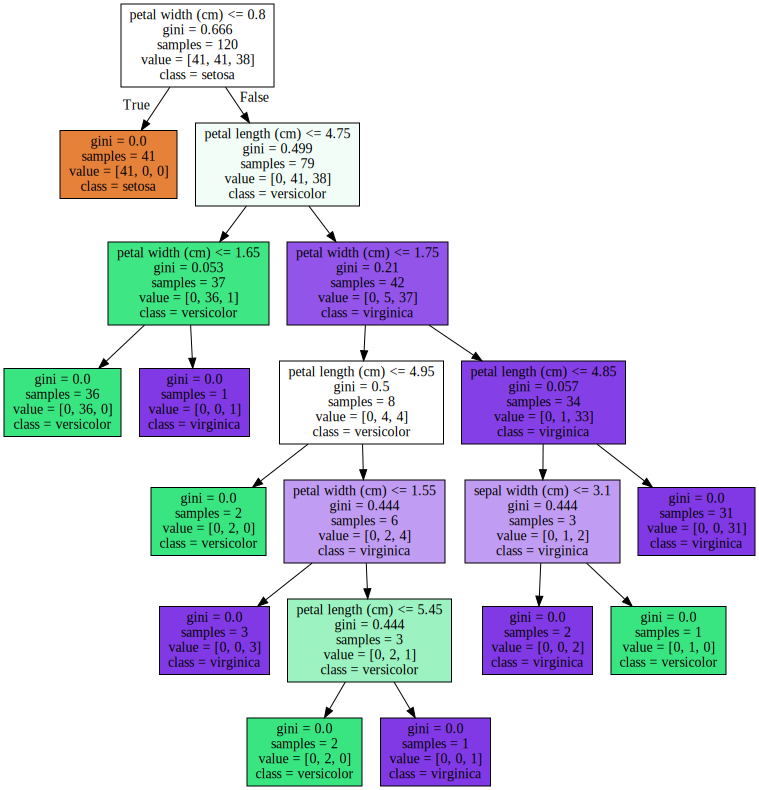

In [11]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

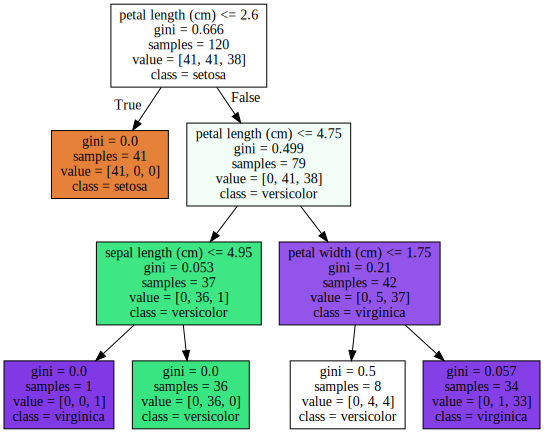

In [12]:
# 트리 깊이 변화 (max_depth=3)

dt2 = DecisionTreeClassifier(max_depth=3, random_state=156)
dt2.fit(X_train, y_train)

export_graphviz(dt2, out_file='tree2.dot',
                class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,
                impurity=True, filled=True)

with open('tree2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

트리 깊이가 3으로 설정

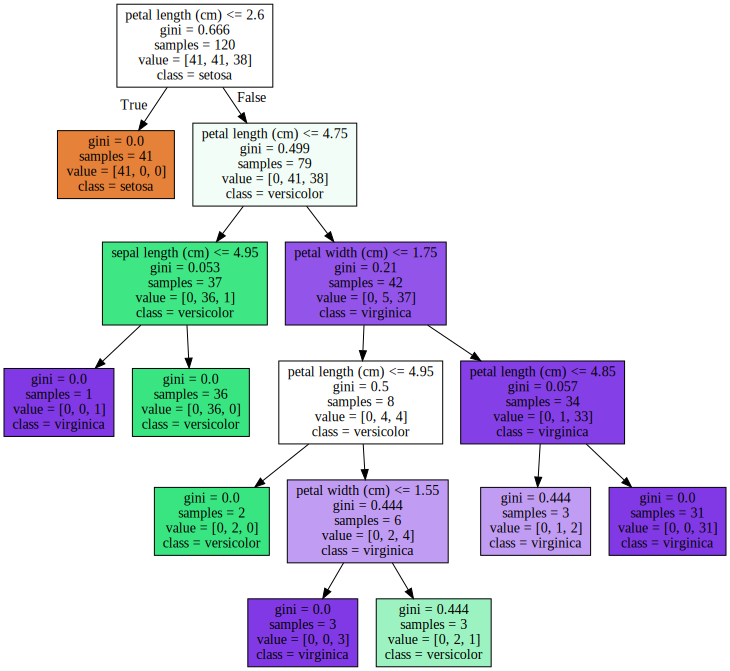

In [13]:
# min_samples_split=4
# 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수

dt3 = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dt3.fit(X_train, y_train)

export_graphviz(dt3, out_file='tree3.dot',
                class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,
                impurity=True, filled=True)

with open('tree3.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

마지막 오른쪽에 value=[0, 2, 1], value=[0, 1, 2]인 노드를 보면 samples=3이기 때문에 트리 분할을 더하지 않는다.  
트리 깊이도 줄고 간결해졌다.

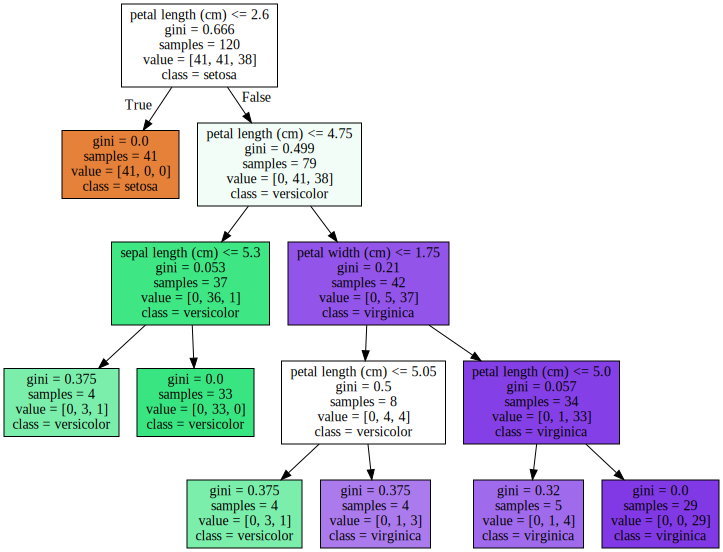

In [14]:
# min_samples_leaf=4
# 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값을 지정
# default = 1

dt3 = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)
dt3.fit(X_train, y_train)

export_graphviz(dt3, out_file='tree3.dot',
                class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,
                impurity=True, filled=True)

with open('tree3.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

*min_samples_leaf* 값을 키우면 더 이상 분할하지 않고, 리프 노드가 될 수 있는 조건이 완화됨

Feature importances: 
 [0.    0.017 0.4   0.584]
sepal length (cm): 0.000
sepal width (cm): 0.017
petal length (cm): 0.400
petal width (cm): 0.584


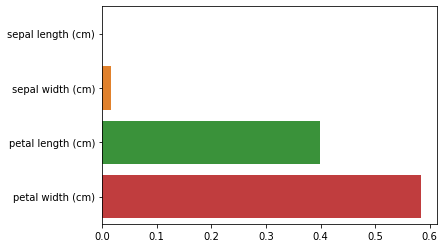

In [19]:
# feature importance
import seaborn as sns
import numpy as np

# feature importance 추출
print("Feature importances: \n", np.round(dt.feature_importances_, 3))

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt.feature_importances_):
    print(f'{name}: {value:.3f}')

# feature importance를 column별로 시각화하기
sns.barplot(x=dt.feature_importances_, y=iris_data.feature_names);

*petal_width*가 가장 피처 중요도가 높다.

### 결정 트리 과적합(Overfitting)

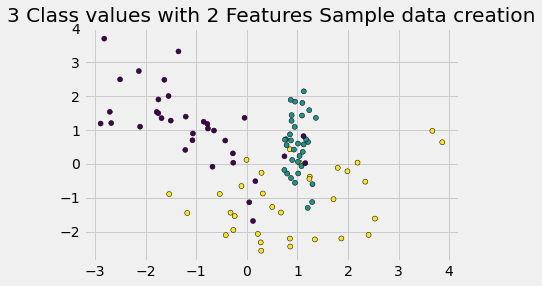

In [25]:
"""결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하는지와 이로 인한 과적합 문제 확인"""

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해 피쳐는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처를 2차원 좌표 시각화, 각 클래스 값은 다른 색으로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k');

In [27]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

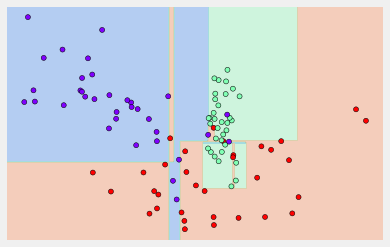

In [28]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는(하이퍼 파라미터를 디폴트로) 결정 트리의 학습과 결정 경계 시각화
dt = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt, X_features, y_labels)

일부 이상치(Outlier) 데이터까지 분류하기 위해 분할이 자주 일어나 결정 기준 경계가 매우 많아졌다.

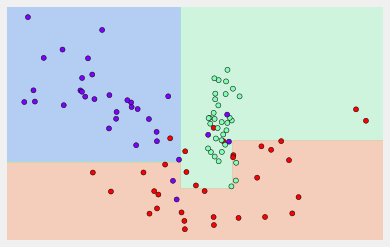

In [29]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 (리프 노드 생성 규칙 완화) 결정 경계 시각화
dt = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt, X_features, y_labels)

이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됨  
=> 위의 모델보다 다양한 테스트 데이터 세트를 기반으로 예측할 경우 예측 성능이 더욱 좋다.

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트

http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

* UCI Machine Repository 에서 제공하는 사용자 행동 인식(Human Activity Recognition) 데이터 세트에 대한 예측 분류
* 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피쳐를 수집한 데이터

In [31]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# features.txt 파일에는 피처 이름 index와 피쳐명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드
feature_name_df = pd.read_csv("/gdrive/My Drive/Python/파이썬_머신러닝_완벽_가이드/data/UCI HAR Dataset/UCI HAR Dataset/features.txt",
                              sep='\s+', header=None, names=['column_index', 'column_name'])

# 피쳐명 index를 제거하고, 피쳐명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피쳐명에서 10개만 추출: \n', feature_name[:10])

전체 피쳐명에서 10개만 추출: 
 ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [83]:
feature_name_df.head(3)

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z


In [35]:
# 'feature_info'에 중복된 피쳐명 확인
# 중복된 피쳐명에 _1 또는 _2를 추가로 부여해 변경

feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [69]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0] + '_' + str(x[1]) if x[1] > 0 else x[0], axis=1)
    return new_feature_name_df

df = get_new_feature_name_df(feature_name_df)
df.head()

,index,column_index,column_name,dup_cnt
0,0,1,tBodyAcc-mean()-X,0
1,1,2,tBodyAcc-mean()-Y,0
2,2,3,tBodyAcc-mean()-Z,0
3,3,4,tBodyAcc-std()-X,0
4,4,5,tBodyAcc-std()-Y,0


In [72]:
df.sort_values('dup_cnt', ascending=False)

,index,column_index,column_name,dup_cnt
421,421,422,"fBodyAccJerk-bandsEnergy()-1,24_2",2
343,343,344,"fBodyAcc-bandsEnergy()-25,48_2",2
341,341,342,"fBodyAcc-bandsEnergy()-49,64_2",2
493,493,494,"fBodyGyro-bandsEnergy()-41,48_2",2
488,488,489,"fBodyGyro-bandsEnergy()-1,8_2",2
...,...,...,...,...
181,181,182,tBodyGyroJerk-iqr()-Z,0
180,180,181,tBodyGyroJerk-iqr()-Y,0
179,179,180,tBodyGyroJerk-iqr()-X,0
178,178,179,tBodyGyroJerk-energy()-Z,0


In [73]:
import pandas as pd

# 원본 피쳐명에 _1 또는 _2를 추가로 부여해 새로운 피쳐명을 가지는 DataFrame을 반환하는 함수 생성
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0] + '_' + str(x[1]) if x[1] > 0 else x[0], axis=1)
    return new_feature_name_df


def get_human_dataset():

    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep로 할당
    feature_name_df = pd.read_csv("/gdrive/My Drive/Python/파이썬_머신러닝_완벽_가이드/data/UCI HAR Dataset/UCI HAR Dataset/features.txt",
                                  sep='\s+', header=None, names=['column_index', 'column_name'])
    
    # 중복된 피쳐명을 수정하는 get_new_feature_name_df()를 이용, 신규 피쳐명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피쳐명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 2].values.tolist() # 책에는 iloc[:, 1]로 되어 잇는데 1은 columns_index이므로 오타인듯하다.

    # 학습 피쳐 데이터 세트와 테스트 피쳐 데이터를 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv("/gdrive/My Drive/Python/파이썬_머신러닝_완벽_가이드/data/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt",
                          sep='\s+', names=feature_name)
    X_test = pd.read_csv("/gdrive/My Drive/Python/파이썬_머신러닝_완벽_가이드/data/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt",
                         sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv("/gdrive/My Drive/Python/파이썬_머신러닝_완벽_가이드/data/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt",
                          sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv("/gdrive/My Drive/Python/파이썬_머신러닝_완벽_가이드/data/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt",
                         sep='\s+', header=None, names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [67]:
print("## 학습 피처 데이터셋 info()")
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 1 to 561
dtypes: float64(561)
memory usage: 31.5 MB
None


전부 float이므로 Label Encoding은 불필요

In [84]:
X_train.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.999918,-0.991364,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.999867,-0.991134,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.999845,-0.986658,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986

In [42]:
# 레이블 값 확인 -> 고르게 분포되어 있음
print(y_train['action'].value_counts().sort_index())

1    1226
2    1073
3     986
4    1286
5    1374
6    1407
Name: action, dtype: int64


In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
# 하이퍼 파라미터는 디폴트 값으로
dt = DecisionTreeClassifier(random_state=156)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f'결정 트리 예측 정확도: {accuracy:.4f}')

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터: \n', dt.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [76]:
# 결정 트리의 트리 깊이(Tree Depth)가 예측 정확도에 주는 영향
# GridSearchCV를 이용해 성능 확인

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f'GridSearchCV 최고 평균 정확도 수치: {grid_cv.best_score_:.4f}')
print('GridSearchCv 최적 하이퍼 파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.9min finished


GridSearchCV 최고 평균 정확도 수치: 0.8513
GridSearchCv 최적 하이퍼 파라미터:  {'max_depth': 16}


*max_depth* 가 16일 때, 최고 평균 정확도 85.13% 도출  
*max_depth* 값의 증가에 따라 예측 성능이 어떻게 변하는지 확인

In [77]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그 때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


결정 트리는 노드를 지속적으로 분할하면서 깊이가 깊어지고 복잡한 모델이 된다.  
깊어진 트리는 학습 데이터에 대해서는 잘 예측하지만 검증 데이터 셋에는 과적합으로 인해 성능 저하가 유발될 수 있다.

In [78]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt.fit(X_train, y_train)
    pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(f'max_depth = {depth:>3} 정확도: {accuracy:.4f}')

max_depth =   6 정확도: 0.8558
max_depth =   8 정확도: 0.8707
max_depth =  10 정확도: 0.8673
max_depth =  12 정확도: 0.8646
max_depth =  16 정확도: 0.8575
max_depth =  20 정확도: 0.8548
max_depth =  24 정확도: 0.8548


*max_depth* 가 8일 때 정확도가 87.07%로 가장 높고 이후로는 깊어질수록 정확도가 떨어진다.

In [79]:
params = {
    'max_depth': [8, 12, 16, 20],
    'min_samples_split': [16, 24]
}

grid_cv = GridSearchCV(dt, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f'GridSearchCV 최고 평균 정확도 수치: {grid_cv.best_score_:.4f}')
print('GridSearchCV 최적 하이퍼 파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.2min finished


GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_split': 16}


* *max_depth*가 8, *min_samples_split*이 16일 때, 85.49%로 정확도가 가장 높다.

In [80]:
best_dt = grid_cv.best_estimator_
pred1 = best_dt.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print(f'결정 트리 예측 정확도: {accuracy:.4f}')

결정 트리 예측 정확도: 0.8717


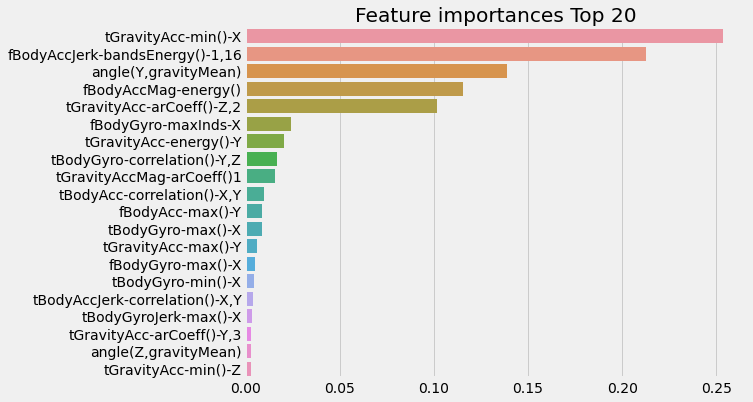

In [81]:
# 중요도가 높은 순으로 Top 20 피쳐를 막대그래프로 표현

import seaborn as sns

ftr_importances_values = best_dt.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, Seaborn의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

# 중요도 값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top20, y=ftr_top20.index, orient='h')
plt.title('Feature importances Top 20')
plt.show()

## 03. 앙상블 학습

### 앙상블 학습 개요

* **앙상블 학습(Ensemble Learning)**을 통한 분류  
여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법  
* **목표**: 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것
---
* **보팅(Voting)**
    * 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
    * **서로 다른 알고리즘을 가진 분류기를 결합**
    * ex) Linear Regression, K-NN, SVM 등의 ML 알고리즘을 통해 학습하고 예측한 결과를 가지고 Voting을 통해 최종 예측


* **배깅(Bagging. Bootstrap Aggregating)**
    * 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
    * 분류기가 모두 같은 유형의 알고리즘 기반, **데이터 샘플링을 다르게 가져가면서 학습을 수행**
    * 하나의 ML 알고리즘, 여러 데이터 세트를 가지고 분류기들이 학습
    * *랜덤 포레스트(Random Forest)* 가 대표적인 배깅 모델
    * 교차 검증이 데이터 세트 간의 중복을 허용하지 않는 것과 다르게 배깅은 데이터 세트 간의 중복을 허용


| **Bagging(Bootstrap Aggregating)** |           **Random Forest**            |
|:----------------------------------:|:--------------------------------------:|
| 중복을 허용한 랜덤 샘플링 기법     |         부트스트랩 샘플 사용           |
| Bootstrap 자료를 모델링하고 결합해서 최종 모델 산출    |  Decision Tree를 Random 하게 만들고 이 때 *설명 변수를 제한* |
|  Train Set에서 데이터 랜덤 추출 (모든 변수를 사용)  |  Tree마다 독립 변수가 다르게 들어가도록 독립 변수의 수를 제한          |

<center>데이터 셋에서 일부를 랜덤 추출하여 학습에 사용하지만 random subset에 있는 변수의 수가 다르다.</center>


* **부스팅(Boosting)**
    * 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 **다음 분류기에게는 가중치(weight)를 부여**하면서 학습과 예측을 진행

    * **Gradient Boosting**
        * 가중치 부여시 Gradient Descent 알고리즘 사용
        * 단점: 느리다. Overfitting 문제
    
    * **XgBoost** (eXtra Gradient Boost)
        * Gradient Boosting 단점 보완 -> GBM보다 빠르다. Overfitting 방지할 규제
        * 가중치 부여는 Gradient Descent 알고리즘 사용
        * 분류, 회귀 가능
        * early stopping

    * **LightGBM** (Light Gradient Boost)
        * XgBoost 단점 (여전히 느린 속도, hyper parameter가 많다.) 보완
        * 대용량 데이터 처리 가능
        * 적은 자원 사용, 빠르다
        * GPU 사용 가능
        * *Leaf Wise* 트리 분할 방식(DFS)  
        => 비대칭적이고 깊은 트리 생성 (동일 leaf 생성시 level-wise보다 손실이 적다. (트리의 균형을 안 맞춰도 됨)
        * Overfitting에 민감 (작은 데이터셋에는 사용을 지양)

    * **AdaBoost** (Adaptive Boost)
        1. Train data 중 샘플링하여 학습, 해당 모델의 정확도 측정
        2. 에러가 발생한 데이터를 찾고, 가중치를 더 준 상태에서 다음 모델을 위한 데이터 추출  
            -> 가중치가 큰 데이터 (이전에 에러 발생한)가 들어올 확률 상승
        3. 위 과정 반복 -> 완벽한 모델 생성
        * Classification 에 대한 모델?

    * **CatBoost** (https://dailyheumsi.tistory.com/136)
        * 데이터에 범주형(Categorical) 변수가 많을 때 유용한 모델
        1. *Level-Wise*로 트리 생성 (XgBoost와 같다.)
        2. *Ordered Boosting*  
            * 데이터 일부만 가지고 학습 (잔차 계산) -> 다음 모델 예측  
            * 순서에 따라 모델을 만들고 예측하는 방식
        3. *Random Permutation*  
            * 데이터를 랜덤하게 가져옴 (Overfitting 방지. 트리를 다각적으로 만들기 위함)
        4. *Ordered Target Encoding* 
            * Target Encoding, Mean Encoding, Response Encoding 이라고도 부름
            * 범주형 변수를 수로 인코딩 시키는 방법
        5. *Categorical Feature Combinations*
            * Information Gain이 동일한 두 feature를 하나로 처리
        6. *One Hot Encoding*
            * 낮은 Cardinality를 가지는 범주형 변수에 한해서 적용
        7. *Optimized Parameter Tuning*
            * 기본 파라미터가 최적화가 잘 되어 있다. => 파라미터 튜닝에 크게 신경 쓰지 않아도 된다.
        * 데이터가 대부분 수치형이거나 Sparse Matrix는 잘 처리하지 못한다.


* **스태킹(Stacking)**
    * 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법
    * 캐글 같은 대회에서 많이 사용
    * 기본적인 Stacking Ensemble 방법은 Overfitting 문제가 있어서 잘 사용하지 않는다.  
        => CV 기반의 Stacking을 주로 사용

    * Stacking Ensemble
        * Model Averaging
            * 예측 결과에 대한 편차 감소 -> Overfitting 감소
        * Weighted Averaging Model
            * sub model 결합시 weight 부여
        * Stacked Generalization
            * sub model 결합시 linear weighted sum으로 대체
            * 개별 모델이 예측한 데이터를 다시 trainig set으로 사용해서 학습

### 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

* **하드 보팅**(Hard Voting)
    * 예측한 결과값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정

* **소프트 보팅**(Soft Voting)
    * 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 지정

* **일반적으로 소프트 보팅**이 보팅 방법으로 적용

### 보팅 분류기(Voting Classifier)

* 보팅 방식의 앙상블을 이용한 위스콘신 유방암 데이터 세트 예측 분석
* 로지스틱 회귀와 KNN 알고리즘 사용

In [88]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [90]:
"""
VotingClassifier 클래스는 주요 생성 인자로 estimators와 voting 입력 받음
estimators: Classifier 객체들을 튜플 형식으로 입력 받음
voting: 'hard' or 'soft' (default='hard')
"""

# 개별 모델은 로지스틱 회귀와 KNN
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo = VotingClassifier(estimators=[('LR', lr), ('KNN', knn)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=13)

# VotingClassifier 학습/예측/평가
vo.fit(X_train, y_train)
pred = vo.predict(X_test)
print('Voting 분류기 정확도: {:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr, knn]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9211
LogisticRegression 정확도: 0.9211
KNeighborsClassifier 정확도: 0.8947


* Voting과 LogisticRegression 의 성능이 같은데, Voting으로 여러 개의 분류기를 결합한다고 해서 무조건 예측 성능이 향상되는 것은 아니다.
* 데이터의 특성과 분포 등 다양한 요건에 따라 오히려 분류기 중 가장 좋은 분류기의 성능이 Voting을 사용했을 때보다 나을 수도 있다.

## 04. 랜덤 포레스트

* 배깅(bagging): 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘
* 배깅의 대표적인 알고리즘이 랜덤 포레스트
    * 비교적 빠른 수행
    * 결정 트리의 쉽고 직관적인 장점
* 랜덤 포레스트는 여러 개의 결정 트리 분류기가 *전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링*해 개별적으로 학습을 수행한 뒤   
최종적으로 모든 분류기가 보팅(소프트 보팅)을 통해 예측 결정
* **부트스트래핑(bootstrapping) 분할 방식**: 여러 개의 데이터 세트를 중첩되게 분리하는 것
* 랜덤 포레스트의 서브셋 데이터는 부트스트래핑으로 임의의 데이터를 만든다.  
이 때, 서브셋의 데이터 건수는 전체 데이터 건수와 동일하지만, 개별 데이터가 중첩되어 만들어진다.
* 랜덤 포레스트는 데이터가 중첩된 개별 데이터 세트에 결정 트리 분류기를 각각 적용한다.

In [91]:
# 사용자 행동 데이터 세트를 이용한 RandomForestClassifier 예제
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf = RandomForestClassifier(random_state=13)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy_score(y_test, pred)))

랜덤 포레스트 정확도: 0.9281


92.81%의 정확도 (결정 트리의 GridSearchCV 알고리즘은 87%정도)

### 랜덤 포레스트 하이퍼 파라미터 및 튜닝

* 트리 기반 앙상블 알고리즘의 단점은 하이퍼 파라미터가 너무 많고, 이로 인해 튜닝을 위한 시간이 많이 소모된다.  
또한 튜닝 후 예측 성능이 크게 향상되지 않는 경우가 많다..

* *n_estimators*
    * 랜덤 포레스트에서 결정 트리의 개수를 지정
    * default=100
    * 많이 설정할수록 좋은 성능이 나올 수 있지만 무조건적인 것은 아니고, 늘릴수록 학습 시간도 많이 소요된다.

* *max_features*
    * 결정 트리에 사용된 *max_features*와 같다.
    * default='auto' ('sqrt'와 같다)
    * 트리를 분할하는 피처를 참조할 때 전체 피쳐가 아니라 $\sqrt{전체 피쳐 개수}$만큼 참조한다.
    * *max_depth*나 *min_samples_leaf*와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 똑같이 적용될 수 있다.

In [92]:
# 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [8, 12, 18],
    'min_samples_split': [8, 16, 20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf = RandomForestClassifier(random_state=13, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9151


In [93]:
# n_estimators를 300으로 증가, 최적화 하이퍼 파라미터로 RandomForestClassifier를 학습 후 테스트 세트에서 예측 성능 측정
rf1 = RandomForestClassifier(n_estimators=300,
                             max_depth=10,
                             min_samples_leaf=8,
                             min_samples_split=8,
                             random_state=13,
                             n_jobs=-1)

rf1.fit(X_train, y_train)
pred = rf1.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9182


성능이 아주 약간 상승(0.3%)

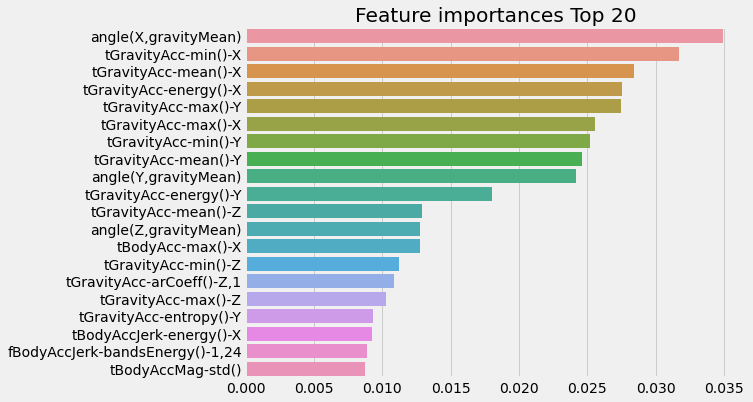

In [94]:
# Feature Importance 시각화

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

ftr_importances_values = rf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.title('Feature importances Top 20')
plt.show()

## 05. GBM(Gradient Boosting MAchine)